# Data Visualization and Prediction with Python
 

In [7]:
import csv
import numpy as np
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt


### Data Formation and Parsing
Using the csv and datetime packages, we reformat the given data into proper datetime format and sort it time.

In [8]:
def get_all_cases():
    with open("info/covid19dataexport.csv", "r") as csvfile:
        reader = csv.reader(csvfile)
        all_cases = list(reader)[1:]
        # ignore the case numbers
        for i in range(len(all_cases)):
            all_cases[i] = all_cases[i][1:]
            year = int(all_cases[i][0].split('-')[0])
            month = int(all_cases[i][0].split('-')[1])
            day = int(all_cases[i][0].split('-')[2])
            formatted_date = datetime(year,month,day)
            all_cases[i][0] = formatted_date
        all_cases.sort()
        return all_cases

### Creating Cases per Day & Cases per Week


In [9]:
def get_per_day(all_cases: dict):
    case_per_day = dict()
    for case in all_cases:
        if case[0] in case_per_day:
            case_per_day[case[0]] +=1
        else:
            case_per_day[case[0]] = 1
    return case_per_day
def get_per_week(all_cases: dict):
    case_per_week = dict()
    # First case 3/06, week will start there. We will use a sliding timeframe to group these.
    # Therefore, the cases sums start at 3/13
    key = datetime(2020,3,13)
    for case in all_cases:
        while (case[0] >= key):
            key += timedelta(days=7)

        if key in case_per_week:
            case_per_week[key] +=1
        else:
            case_per_week[key] = 1
    return case_per_week


### Normal Average & Weighted Averages (bandits algorithm)
Here, we use a weighted average of the previous cases per day to predict the next upcoming day. 

In [10]:
def normal_ave(dct):
    n = 0
    ave = 0
    daily_ave = dict()
    for day in dct.keys():
        n+=1
        ave = ave + (1/n)*(dct[day]-ave)
        daily_ave[day] = ave
    return daily_ave
def weighted_ave(dct, ss):
    n = 0
    ave = 0
    daily_ave = dict()
    for day in dct.keys():
        n+=1
        ave = ave + (ss)*(dct[day]-ave)
        daily_ave[day] = ave
    return daily_ave

You can change the step size to affect how much new points of data affects our running weighted average. It should be between 0 and 1, exclusively. At a stepsize of 0, there is no change to the average. At a stepsize of 1, it follows the data perfectly.

As you can see, a normal running average is terrible for analysis. Spikes and changes in data barely affect the overall average. Using a constant step-size is a little better for modelling, as it follows the data closely. However, a weighted average does not give us much information about future predictions.

In [11]:
STEP_SIZE = 0.15

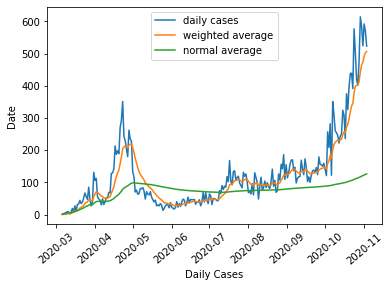

In [14]:
all_cases = get_all_cases()
pday = get_per_day(all_cases)
m = normal_ave(pday)
w = weighted_ave(pday, STEP_SIZE)
plt.ylabel('Date')
plt.xticks(rotation=40)
plt.xlabel('Daily Cases')

plt.plot(pday.keys(), pday.values())
plt.plot(w.keys(), w.values())
plt.plot(m.keys(), m.values())
plt.legend(["daily cases", "weighted average", "normal average"], loc=9)
plt.show()

